<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/colab/stability_vs_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# then import it
from denmune import DenMune

In [ ]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets

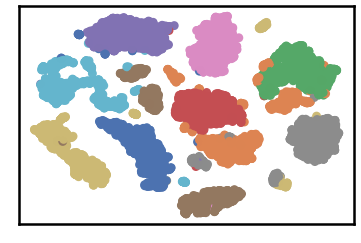

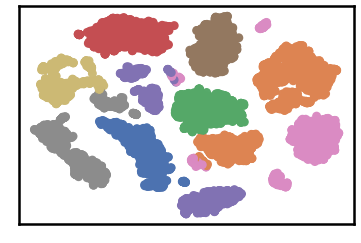

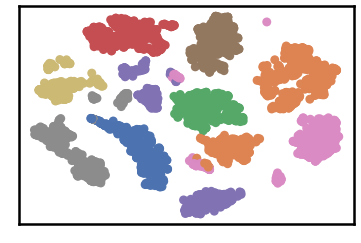

k= 199 F1 score is: 0.7960390378193465


In [7]:
data_path = 'datasets/denmune/pendigits/'  
file_2d = data_path + 'pendigits-2d.csv'

X_train = pd.read_csv(data_path + 'train.csv', sep=',', header=None)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop(X_train.columns[-1], axis=1) 
X_test = pd.read_csv(data_path + 'test.csv', sep=',', header=None) 
X_test = X_test.drop(X_test.columns[-1], axis=1)

data_stability = [] 

from IPython.display import clear_output
for knn in range (10, 110, 10):
  clear_output(wait=True)
  dm = DenMune(train_data=X_train,
             train_truth=y_train,
             test_data=X_test, 
             k_nearest=knn,
             file_2d=file_2d,
             rgn_tsne=False)

  labels, validity = dm.fit_predict(show_plots=True, show_analyzer=False)
  
  validity_key = "F1"      
  print ('k=' , knn, validity_key , 'score is:', validity['train'][validity_key])
  data_stability.append([knn, validity['train'][validity_key]])


In [29]:
#computing moving average to smoth the curve
x, y = zip(*data_stability)
window = 5
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

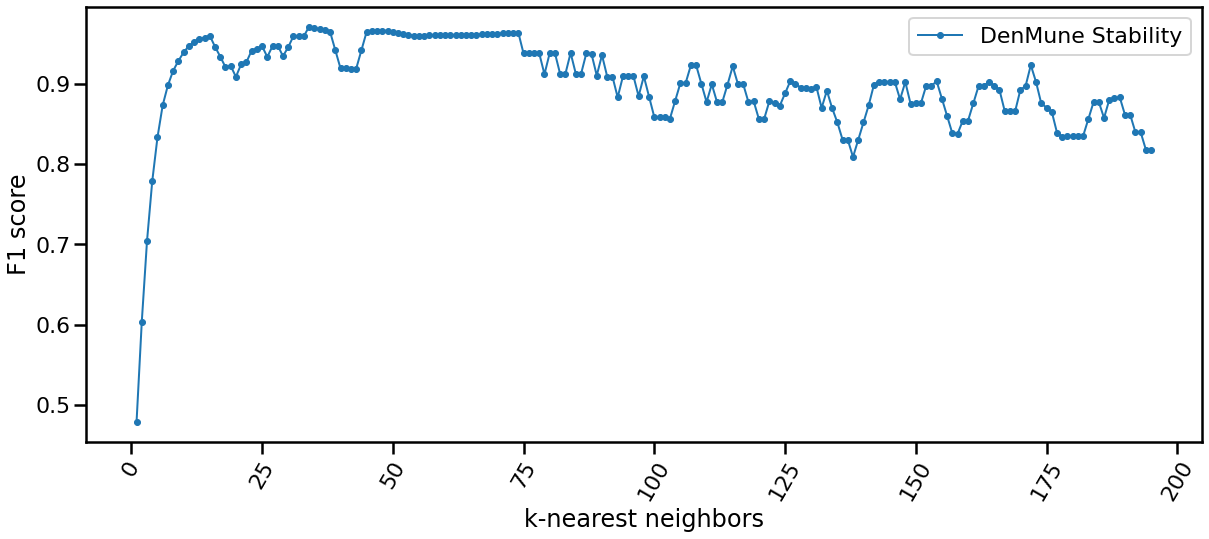

In [30]:
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 8])
ax.plot(x[:-window+1], y, marker='.', linewidth=2, label='DenMune Stability')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbors')
ax.set_ylabel(validity_key + ' score')
plt.legend()
plt.show()